# Neural Network


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron Algorithm


The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. Perceptron mimics neuron, inputs data from other neurons and outputs to other neurons. 

Perceptron has its own weights `w1, w2, ...`, with input `x1, x2, ...`, total sum of inputs `x1w1 + x2w2 + ...` is lower than threshold $\theta$ outputs 0 vice versa, it is called activate.

Without changing structure, by changing weights and threshold we can build AND, NAND and OR gate.

In [2]:
def AND(x1, x2):
    w1 = 0.5
    w2 = 0.5
    theta = 0.7
    if w1 * x1 + w2 * x2 > theta:
        return 1
    else:
        return 0
print(AND(0,0))
print(AND(0,1))
print(AND(1,1))

0
0
1


Using multiple perceptrons we can also build XOR gate.

In [3]:
def NAND(x1, x2):
    w1 = -0.5
    w2 = -0.5
    theta = -0.7
    if w1 * x1 + w2 * x2 > theta:
        return 1
    else:
        return 0

def OR(x1, x2):
    w1 = 0.5
    w2 = 0.5
    theta = 0.2
    if w1 * x1 + w2 * x2 > theta:
        return 1
    else:
        return 0

def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
0


## Activation Function

Activation function outputs specific values when sum of inputs exceeds threshold. Step function, Sigmoid function, Tanh function, ReLu and Softmax function are most commonly used activation functions.


### Step Function

Step function has output signal similar to shape of steps. Its outputs changes from `0` to `1` when `x=0`

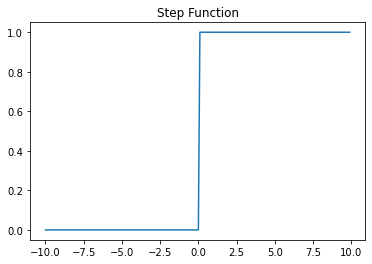

In [4]:
def stepfunc(x):
    return np.where(x <= 0, 0, 1) # if x <= 0 return 0, else return 1

x = np.arange(-10, 10, 0.1)
y = stepfunc(x)

plt.plot(x, y)
plt.title('Step Function')
plt.show()

### Sigmoid Function

Sigmoid means ressembling the latin letter $S$, also graph looks similar to $S$. Sigmoid function is defined as :

$$
y = \frac{1}{1 + e^{-x}}
$$

Outputs are real number between 0 to 1

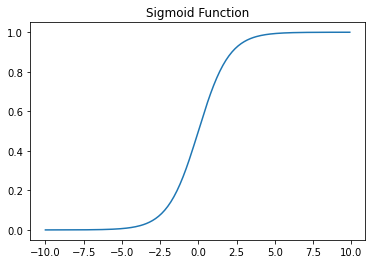

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.title('Sigmoid Function')
plt.show()

### tanh Function

tanh is hyperbolic tangent, it outputs similar graph as sigmoid while sigmoid outputs `0 ~ 1` tanh outputs `-1 ~ 1`.
tanh is defined as :


$$
y = \frac{\sinh{x}}{\cosh{x}} = \frac{e^{x}-e^{-x}}{e^{x} + e^{-x}} = \frac{e^{2x}-1}{e^{2x} +1}
$$

Numpy already has `np.tanh()` function, however we'll be not using `np.tanh()` here.

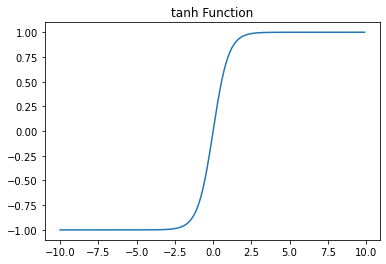

In [17]:
def tanh(x):
    return ((np.exp(2 * x) - 1) / (np.exp(2 * x) + 1) )
x = np.arange(-10, 10, 0.1)
y = tanh(x)

plt.plot(x,y)
plt.title('tanh Function')
plt.show()

### ReLU Function

Sigmoid function was used in the field of neural networks, nowadays ReLU (Rectified linear unit) function is used more often. As `R` stands for rectified, ReLU function turns negative values into 0, therefore if input is below 0, outputs 0, if input exceeds 0, outputs given values.

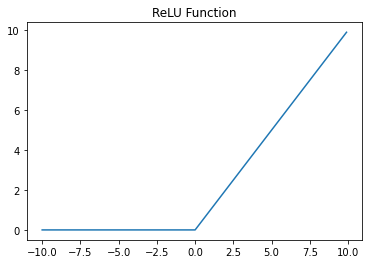

In [23]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)

plt.plot(x,y)
plt.title('ReLU Function')
plt.show()

### Softmax

Softmax is activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes. it normalizes values into `0 ~ 1`. Softmax can be defined as :

x = The input values \
n = The number of classes in the multi-class classifier.

$$
y = \frac{e^{x}}{\sum_{k=1}^{n} e^{x_k}}
$$

https://en.wikipedia.org/wiki/Softmax_function

In [27]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

print(softmax([1,1,3,6,7]))

[0.0017818  0.0017818  0.0131658  0.26444219 0.71882841]


## Multilayer perceptron

We've seen singlelayer perceptron can only perform 